In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Dataset

In [2]:
dataset_path = "./dataset/"

train_data = tf.keras.utils.audio_dataset_from_directory(
    dataset_path,
    batch_size=4,
    shuffle=True,
    validation_split=0.2,
    subset="training",
    output_sequence_length=48000,
    ragged=False,
    label_mode="categorical",
    labels="inferred",
    sampling_rate=None,
    seed=59
)

validation_data = tf.keras.utils.audio_dataset_from_directory(
    dataset_path,
    batch_size=4,
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    output_sequence_length=48000,
    ragged=False,
    label_mode="categorical",
    labels="inferred",
    sampling_rate=None,
    seed=59
)

Found 1998 files belonging to 5 classes.
Using 1599 files for training.
Found 1998 files belonging to 5 classes.
Using 399 files for validation.


Model

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=80, strides=16, activation="relu", input_shape=(48000, 1)),
    tf.keras.layers.MaxPooling1D(4),
    tf.keras.layers.Conv1D(32, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPooling1D(4),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPooling1D(4),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPooling1D(4),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation="softmax")
])

In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 2996, 32)       │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 749, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 747, 32)        │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 186, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 184, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 46, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 44, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         3,525 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,781 (108.52 KB)

 Trainable params: 27,781 (108.52 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Train

In [17]:
history = model.fit(
    train_data, 
    validation_data=validation_data, 
    epochs=20)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 47s 113ms/step - accuracy: 0.2410 - loss: 1.5723 - val_accuracy: 0.5088 - val_loss: 1.2373
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 56s 141ms/step - accuracy: 0.5260 - loss: 1.1729 - val_accuracy: 0.5940 - val_loss: 1.0301
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 50s 125ms/step - accuracy: 0.6270 - loss: 0.9680 - val_accuracy: 0.6617 - val_loss: 0.8475
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 46s 116ms/step - accuracy: 0.6625 - loss: 0.8920 - val_accuracy: 0.6717 - val_loss: 0.8360
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 44s 111ms/step - accuracy: 0.6934 - loss: 0.7717 - val_accuracy: 0.7168 - val_loss: 0.7352
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 45s 112ms/step - accuracy: 0.7472 - loss: 0.6498 - val_accuracy: 0.7368 - val_loss: 0.7542
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 45s 112ms/step - accuracy: 0.7850 - loss: 0.5702 - val_accuracy: 0.8095 - val_loss: 0.5840
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 47s 117ms/step - accuracy: 0.8208 - loss: 0

In [18]:
model.save("weights/singers_audio_classification.h5")

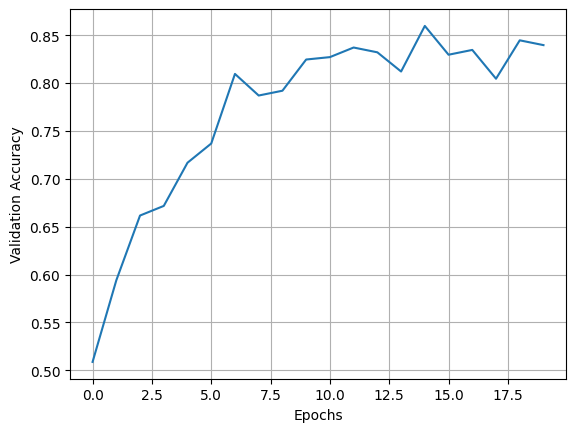

In [23]:
plt.plot(history.history["val_accuracy"])
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid()
plt.show()
plt.show()

In [24]:
loss , accuracy = model.evaluate(validation_data)
print("validation loss:" , loss)
print("validation accuracy:" ,accuracy)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8241 - loss: 0.8069
validation loss: 0.7259549498558044
validation accuracy: 0.8395990133285522
